In [1]:
import toolkit

In [2]:
def caseStudyAnalysis(dataSet):
    print dataSet['times']
    print dataSet['data'].shape
    print dataSet['data']['entity'].nunique()

    from sklearn.tree import DecisionTreeClassifier
    modelInstance = DecisionTreeClassifier(max_leaf_nodes=8, criterion='entropy')
    modelSimpler = DecisionTreeClassifier(max_leaf_nodes=4, criterion='entropy')
    churnModel = toolkit.refinement.makeAndUpdateModel(rootDirectory, dataSet['data'], 2, 'netchurn', modelInstance, modelSimpler, visualize=True, scoreOnly=False) 

    folds = 5
    churnModelMoreFolds = toolkit.refinement.makeAndUpdateModel(rootDirectory, dataSet['data'], folds, 'netchurn', modelInstance, modelSimpler, scoreOnly=False) 

    print dataSet['data']['netchurn'].mean()
    print dataSet['data']['netchurn'].var()
    print dataSet['data']['netchurn'].std()
    print dataSet['data']['netchurn'].max()
    print dataSet['data']['netchurn'].min()

    churnBinnedCategories = ['churnLow','churnMedium','churnHigh','churnHigher', 'churnHighest']
    dataSetUpdated = toolkit.utilities.addBinnedResponseCategory(dataSet['data'], 'netchurn', churnBinnedCategories)

    from sklearn.tree import DecisionTreeClassifier
    modelInstance = DecisionTreeClassifier(max_leaf_nodes=8, criterion='entropy')
    churnModelCategories = toolkit.refinement.makeAndUpdateModel(rootDirectory, dataSetUpdated, 2, churnBinnedCategories, modelInstance, modelSimpler, visualize=True, scoreOnly=False) 

    folds = 3
    churnModelCategories = toolkit.refinement.makeAndUpdateModel(rootDirectory, dataSetUpdated, folds, churnBinnedCategories, modelInstance, modelSimpler, visualize=True, scoreOnly=False) 

    addedModel = toolkit.refinement.makeAndUpdateModel(rootDirectory, dataSet['data'], 2, 'added', modelInstance, modelSimpler, visualize=True, scoreOnly=False) 

    alteredData = dataSet['data'].drop(['netchurn','deleted'], axis=1)
    addedModel = toolkit.refinement.makeAndUpdateModel(rootDirectory, alteredData, 2, 'added', modelInstance, modelSimpler, visualize=True, scoreOnly=False) 

    alteredData2 = dataSet['data'].drop(['netchurn','deleted','n-revs'], axis=1)
    addedModel2 = toolkit.refinement.makeAndUpdateModel(rootDirectory, alteredData2, 2, 'added', modelInstance, modelSimpler, visualize=True, scoreOnly=False) 

    alteredData3 = dataSet['data'].drop(['netchurn','deleted','n-revs','n-authors'], axis=1)
    addedModel3 = toolkit.refinement.makeAndUpdateModel(rootDirectory, alteredData3, 2, 'added', modelInstance, modelSimpler, visualize=True, scoreOnly=False) 

    from sklearn.tree import DecisionTreeRegressor
    modelInstanceR = DecisionTreeRegressor(max_leaf_nodes=8)
    modelInstanceRsimpler = DecisionTreeRegressor(max_leaf_nodes=4)    
    alteredData4 = dataSet['data'].drop(['netchurn','deleted','n-revs','n-authors','fractal-value'], axis=1)
    nlineModelR = toolkit.refinement.makeAndUpdateModel(rootDirectory, alteredData4, 2, 'nline', modelInstanceR, modelInstanceRsimpler, visualize=False, scoreOnly=False)

    dataSet['data']['nline'].corr(dataSet['data']['indent_lines'], method='spearman')

    alteredData5 = dataSet['data'].drop(['indent_lines','nchar','nstatement','nidentifier'], axis=1)
    nlineModelR2 = toolkit.refinement.makeAndUpdateModel(rootDirectory, alteredData5, 2, 'nline', modelInstanceR, modelInstanceRsimpler, visualize=False, scoreOnly=False)

    alteredData6 = dataSet['data'].drop(['indent_lines','nchar','nstatement','nidentifier', 'nfunction','nfunction2','nfunction3'], axis=1)
    nlineModelR3 = toolkit.refinement.makeAndUpdateModel(rootDirectory, alteredData6, 2, 'nline', modelInstanceR, modelInstanceRsimpler, visualize=False, scoreOnly=False)

    alteredData7 = dataSet['data'].drop(['indent_lines','nchar','nstatement','nidentifier', 'nfunction','nfunction2','nfunction3', 'unique_nidentifier'], axis=1)
    nlineModelR4 = toolkit.refinement.makeAndUpdateModel(rootDirectory, alteredData7, 2, 'nline', modelInstanceR, modelInstanceRsimpler, visualize=False, scoreOnly=False)

    cycloData = dataSet['data'].drop(['cyclomatic_sd', 'cyclomatic_mean'], axis=1)
    cycloModelR = toolkit.refinement.makeAndUpdateModel(rootDirectory, cycloData, 2, 'cyclomatic_max', modelInstanceR, visualize=False, scoreOnly=False)

    cycloData2 = dataSet['data'].drop(['halstead_sd','nidentifier','halstead_mean','halstead_min','cyclomatic_sd', 'cyclomatic_mean', 'halstead_max','nstatement','statement_nesting_mean'], axis=1)
    cycloModelR = toolkit.refinement.makeAndUpdateModel(rootDirectory, cycloData2, 2, 'cyclomatic_max', modelInstanceR, modelInstanceRsimpler, visualize=False, scoreOnly=False)

    indentData = dataSet['data'].drop(['indent_sd','indent_median','indent_max','indent_lines'],axis=1)
    indentModelR = toolkit.refinement.makeAndUpdateModel(rootDirectory, indentData, 2, 'indent_mean', modelInstanceR, modelInstanceRsimpler, visualize=False, scoreOnly=False)

    indentModelC = toolkit.refinement.makeAndUpdateModel(rootDirectory, indentData, 2, 'indent_mean', modelInstance, modelSimpler, visualize=False, scoreOnly=False)

    indentBinnedCategories = ['iLow','iMedium','iHigh','iVeryHigh']
    dataSetUpdated = toolkit.utilities.addBinnedResponseCategory(indentData, 'indent_mean', indentBinnedCategories)
    indentModelC = toolkit.refinement.makeAndUpdateModel(rootDirectory, dataSetUpdated, 2, indentBinnedCategories, modelInstance, modelSimpler, visualize=False, scoreOnly=False)

    import psutil
    cores = psutil.cpu_count()

    from sklearn.ensemble import RandomForestClassifier
    modelCF = RandomForestClassifier(n_estimators=500, criterion='entropy', n_jobs=cores)
    modelCFsimpler = RandomForestClassifier(n_estimators=50, max_leaf_nodes=4, criterion='entropy', n_jobs=cores)    
    updatedModelCF = toolkit.refinement.makeAndUpdateModel(rootDirectory, dataSetUpdated, 2, indentBinnedCategories, modelCF, modelCFsimpler, scoreOnly=False, visualize=False)

105
(2684, 64)
193
Response variable was netchurn
Model.score: 0.987323
accuracy_score: 0.987323
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1139
          1       0.96      0.95      0.96       202

avg / total       0.99      0.99      0.99      1341

roc_auc_score: 0.972175
       name  importance
3     added    0.826081
4   deleted    0.117428
8     nline    0.033219
22    nenum    0.023272
Model.score: 0.983594
accuracy_score: 0.983594
             precision    recall  f1-score   support

          0       1.00      0.98      0.99      1139
          1       0.91      0.99      0.95       202

avg / total       0.98      0.98      0.98      1341

roc_auc_score: 0.986270
      name  importance
0    added    0.910461
1  deleted    0.089539


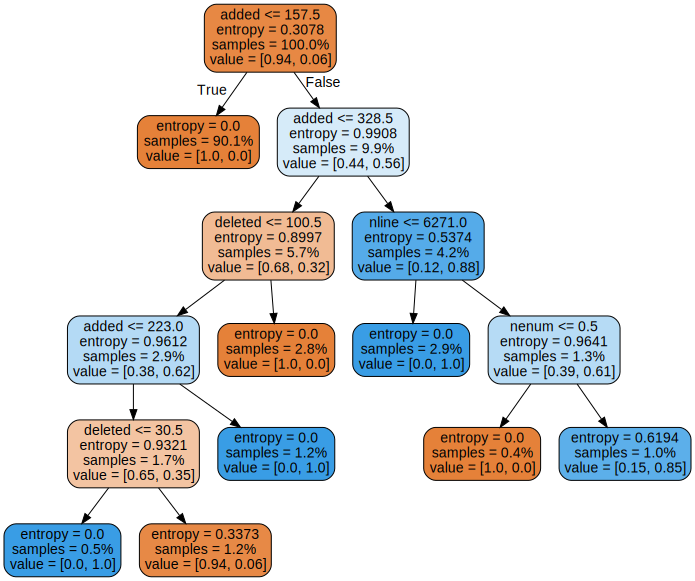

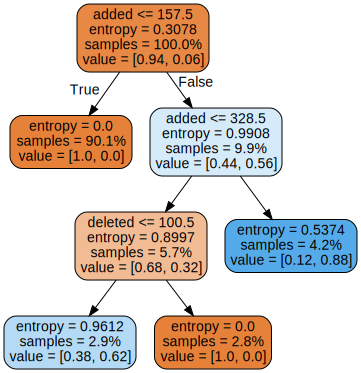

Response variable was netchurn
Model.score: 0.968224
accuracy_score: 0.968224
             precision    recall  f1-score   support

          0       0.97      1.00      0.98       498
          1       0.92      0.59      0.72        37

avg / total       0.97      0.97      0.97       535

roc_auc_score: 0.795289
               name  importance
3             added    0.722792
53    cyclomatic_sd    0.116143
4           deleted    0.108795
38     ncpp_include    0.033315
45  halstead_median    0.018956
Model.score: 0.992523
accuracy_score: 0.992523
             precision    recall  f1-score   support

          0       0.99      1.00      1.00       513
          1       1.00      0.82      0.90        22

avg / total       0.99      0.99      0.99       535

roc_auc_score: 0.909091
              name  importance
3            added    0.803590
4          deleted    0.122597
8            nline    0.038752
12  line_length_sd    0.035061
Model.score: 0.983178
accuracy_score: 0.983178
   

/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


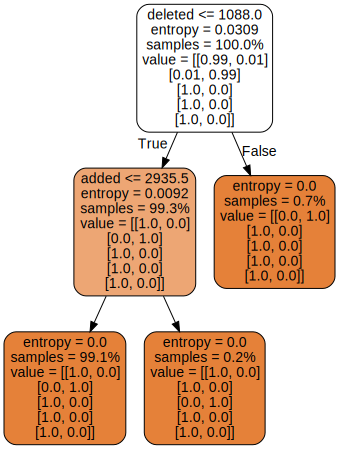

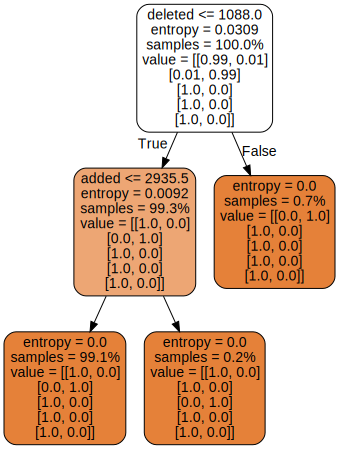

Response variable was ['churnLow', 'churnMedium', 'churnHigh', 'churnHigher', 'churnHighest']
Model.score: 0.997760
accuracy_score: 0.997760
             precision    recall  f1-score   support

          0       0.67      0.67      0.67         3
          1       1.00      1.00      1.00       889
          2       1.00      1.00      1.00         1
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0

avg / total       1.00      1.00      1.00       893

roc_auc_score cannot be computed for this test set
      name  importance
4  deleted     0.73096
3    added     0.26904


/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1076: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Model.score: 0.966405
accuracy_score: 0.966405
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         3
          1       0.98      1.00      0.99       838
          2       0.61      0.74      0.67        34
          3       0.00      0.00      0.00        15
          4       0.00      0.00      0.00         3

avg / total       0.95      0.97      0.96       893

roc_auc_score: 0.646212
       name  importance
4   deleted    0.683155
3     added    0.275209
61     time    0.041636
Model.score: 0.997760
accuracy_score: 0.997760
             precision    recall  f1-score   support

          0       0.67      0.67      0.67         3
          1       1.00      1.00      1.00       889
          2       1.00      1.00      1.00         1
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0

avg / total       1.00      1.00      1.00       893

roc_auc_score cannot be computed for t

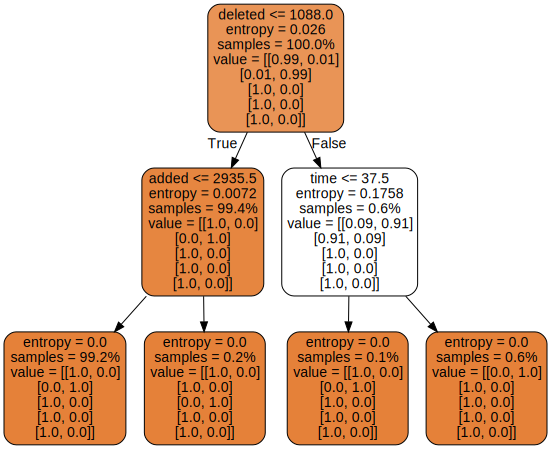

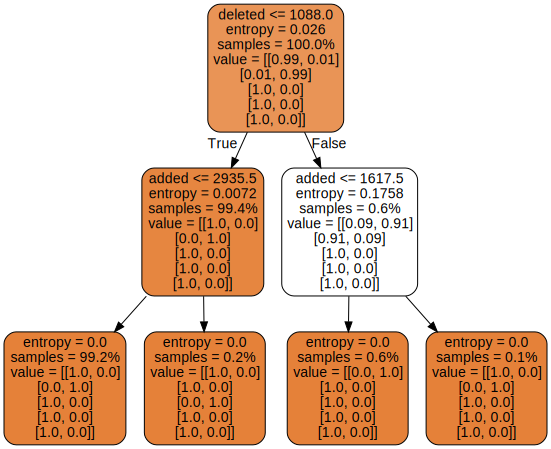

Response variable was added
Model.score: 0.983594
accuracy_score: 0.983594
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1136
          1       0.96      0.93      0.95       205

avg / total       0.98      0.98      0.98      1341

roc_auc_score: 0.960334
              name  importance
6         netchurn    0.690372
3          deleted    0.260814
37  ncpp_directive    0.048814
Model.score: 0.967189
accuracy_score: 0.967189
             precision    recall  f1-score   support

          0       0.99      0.97      0.98      1136
          1       0.87      0.93      0.90       205

avg / total       0.97      0.97      0.97      1341

roc_auc_score: 0.950651
       name  importance
1  netchurn    0.779176
0   deleted    0.220824


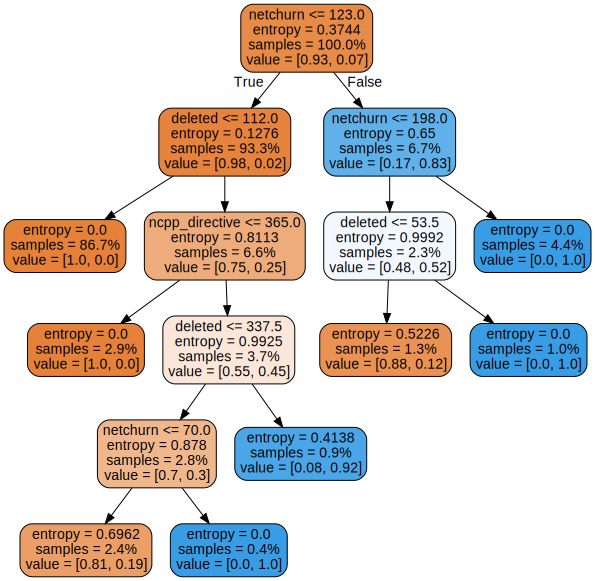

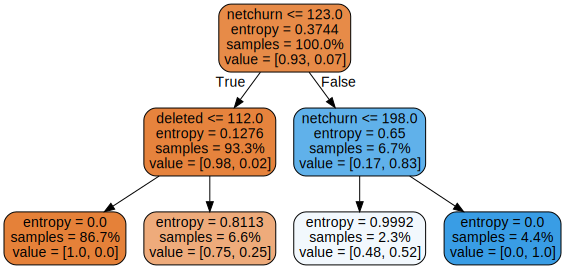

Response variable was added
Model.score: 0.875466
accuracy_score: 0.875466
             precision    recall  f1-score   support

          0       0.91      0.94      0.93      1136
          1       0.61      0.50      0.55       205

avg / total       0.87      0.88      0.87      1341

roc_auc_score: 0.720611
                    name  importance
2                 n-revs    0.637334
18             ninternal    0.183612
59                  time    0.096431
39  nfun_cpp_conditional    0.082624
Model.score: 0.871738
accuracy_score: 0.871738
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1136
          1       0.72      0.26      0.39       205

avg / total       0.86      0.87      0.85      1341

roc_auc_score: 0.622464
        name  importance
0     n-revs    0.761812
1  ninternal    0.238188


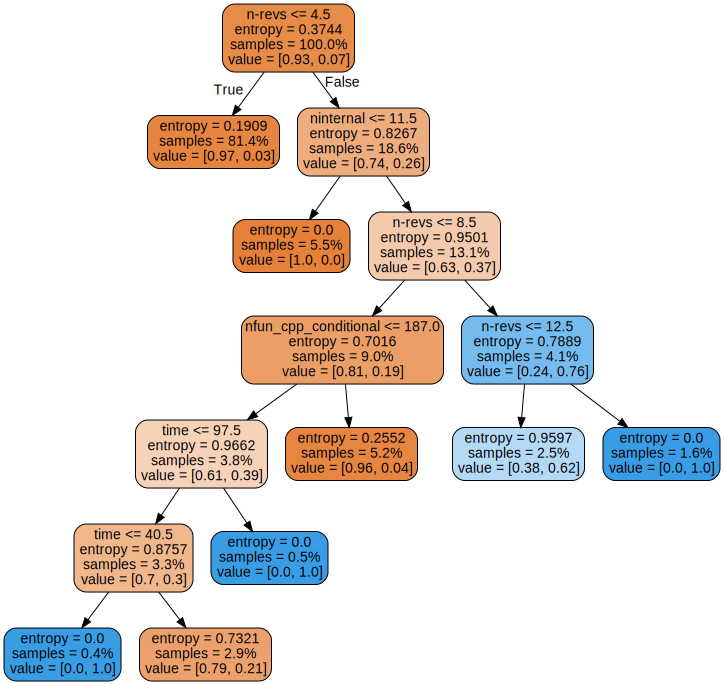

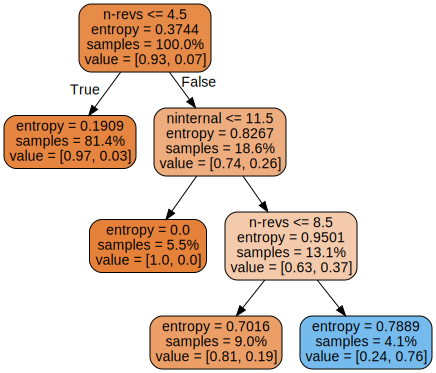

Response variable was added
Model.score: 0.890380
accuracy_score: 0.890380
             precision    recall  f1-score   support

          0       0.92      0.95      0.94      1136
          1       0.66      0.57      0.61       205

avg / total       0.88      0.89      0.89      1341

roc_auc_score: 0.759398
                    name  importance
26               nstruct    0.273766
81  entity_src_channel.c    0.171765
29                 nvoid    0.167381
35          ncpp_include    0.140777
54           indent_mean    0.095277
6       line_length_mean    0.076067
55             indent_sd    0.074968
Model.score: 0.847129
accuracy_score: 0.847129
             precision    recall  f1-score   support

          0       0.85      1.00      0.92      1136
          1       0.00      0.00      0.00       205

avg / total       0.72      0.85      0.78      1341

roc_auc_score: 0.500000
                   name  importance
1               nstruct    0.446665
6  entity_src_channel.c    0.280

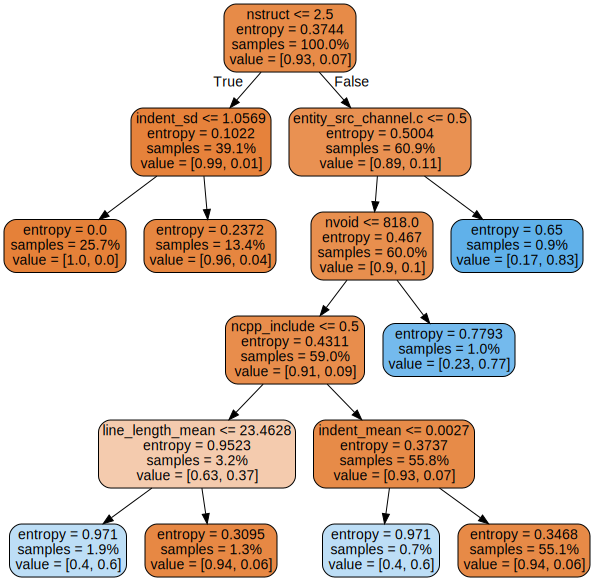

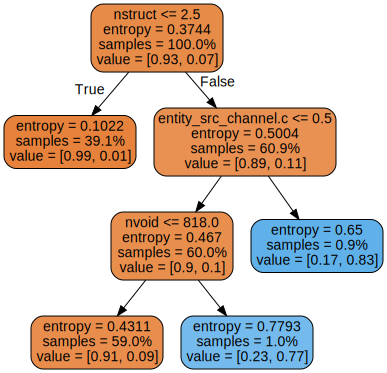

Response variable was added
Model.score: 0.890380
accuracy_score: 0.890380
             precision    recall  f1-score   support

          0       0.92      0.95      0.94      1136
          1       0.66      0.57      0.61       205

avg / total       0.88      0.89      0.89      1341

roc_auc_score: 0.759398
                    name  importance
25               nstruct    0.273766
80  entity_src_channel.c    0.171765
44            nfunction3    0.167381
34          ncpp_include    0.140777
56            indent_max    0.095277
5       line_length_mean    0.076067
54             indent_sd    0.074968
Model.score: 0.847129
accuracy_score: 0.847129
             precision    recall  f1-score   support

          0       0.85      1.00      0.92      1136
          1       0.00      0.00      0.00       205

avg / total       0.72      0.85      0.78      1341

roc_auc_score: 0.500000
                   name  importance
1               nstruct    0.446665
6  entity_src_channel.c    0.280

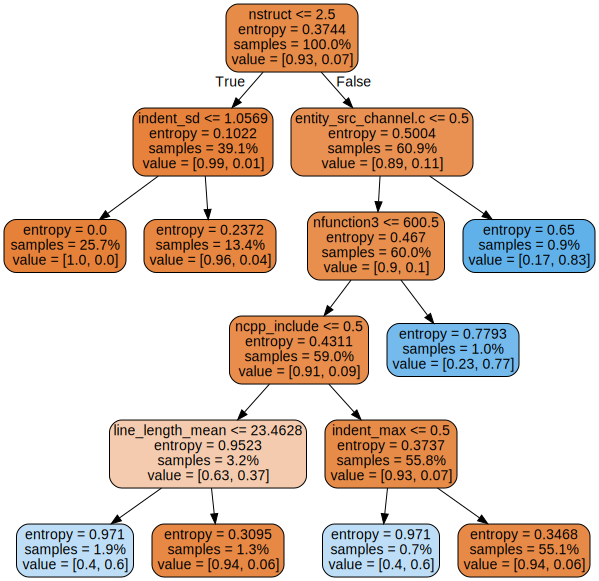

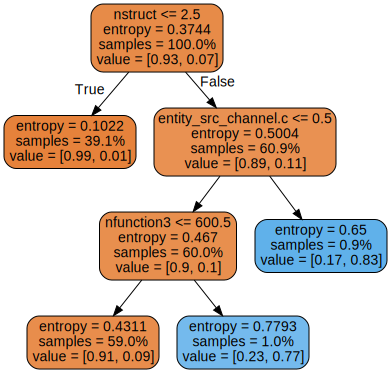

Response variable was nline
Model.score: 0.957072
            name  importance
51  indent_lines    0.987942
43    nfunction3    0.006013
3          nchar    0.004025
42   halstead_sd    0.002020
Model.score: 0.952669
           name  importance
2  indent_lines    0.989942
1    nfunction3    0.006025
0         nchar    0.004033
Response variable was nline
Model.score: 0.841362
                      name  importance
34           ncomment_char    0.853698
14  statement_nesting_mean    0.079579
21                   ngoto    0.027155
40              nfunction2    0.026494
54               indent_sd    0.009563
37        ncpp_conditional    0.002444
33                ncomment    0.001068
Model.score: 0.796397
                     name  importance
2           ncomment_char    0.889481
0  statement_nesting_mean    0.082914
3              nfunction2    0.027605
Response variable was nline
Model.score: 0.871940
                        name  importance
33             ncomment_char    0.854610
11 

In [3]:
rootDirectory = '../dataSets/vimStudy/'
metricsDataVim = toolkit.data.gatherTimeMetrics(rootDirectory, 'https://github.com/vim/vim', rootDirectory+'vim/', '*/*.c */*.h *.c *.h', ['indent','c'], skipEvery=50)
caseStudyAnalysis(metricsDataVim)

180
(14042, 64)
1351
Response variable was netchurn
Model.score: 0.952707
accuracy_score: 0.952707
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      5503
          1       0.87      0.92      0.89      1517

avg / total       0.95      0.95      0.95      7020

roc_auc_score: 0.939754
      name  importance
3    added    0.729123
4  deleted    0.184730
6      soc    0.086147
Model.score: 0.888889
accuracy_score: 0.888889
             precision    recall  f1-score   support

          0       0.88      0.99      0.93      5503
          1       0.94      0.52      0.67      1517

avg / total       0.89      0.89      0.88      7020

roc_auc_score: 0.755328
      name  importance
0    added    0.809231
1  deleted    0.190769


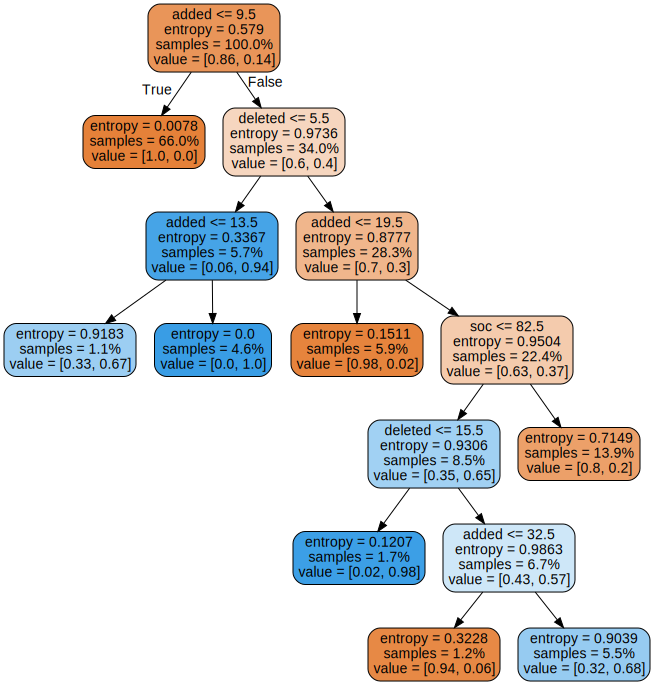

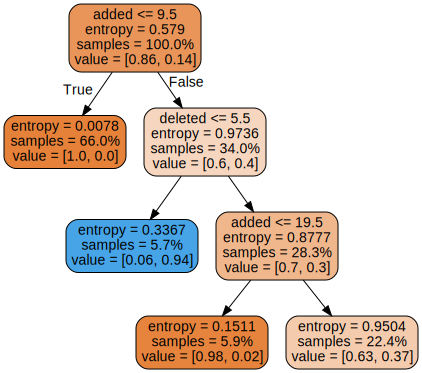

Response variable was netchurn
Model.score: 0.928037
accuracy_score: 0.928037
             precision    recall  f1-score   support

          0       0.94      0.99      0.96      2546
          1       0.73      0.36      0.48       261

avg / total       0.92      0.93      0.92      2807

roc_auc_score: 0.671484
      name  importance
3    added    0.829416
4  deleted    0.170584
Model.score: 0.916281
accuracy_score: 0.916281
             precision    recall  f1-score   support

          0       0.91      0.98      0.94      2037
          1       0.94      0.74      0.83       770

avg / total       0.92      0.92      0.91      2807

roc_auc_score: 0.862750
      name  importance
3    added    0.688105
4  deleted    0.206204
6      soc    0.072749
7    nchar    0.032942
Model.score: 0.941931
accuracy_score: 0.941931
             precision    recall  f1-score   support

          0       0.98      0.95      0.96      2168
          1       0.84      0.92      0.88       639

avg /

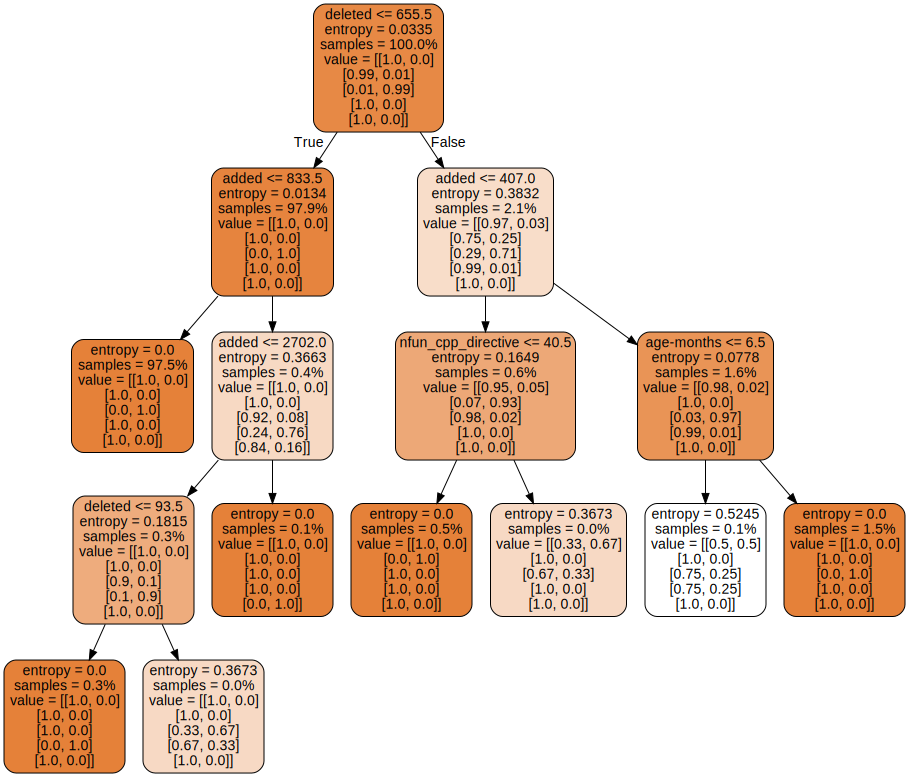

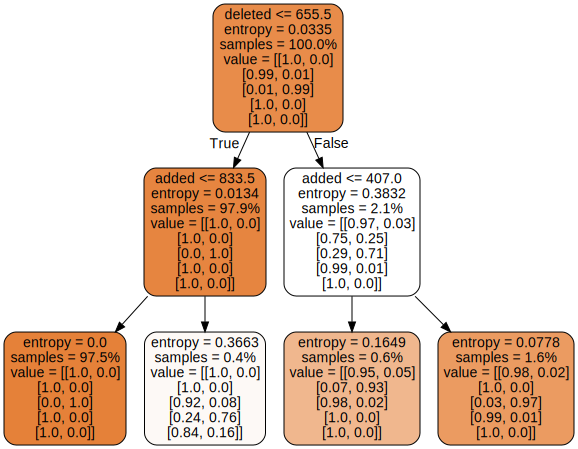

Response variable was ['churnLow', 'churnMedium', 'churnHigh', 'churnHigher', 'churnHighest']
Model.score: 0.976704
accuracy_score: 0.976704
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.13      1.00      0.23        14
          2       1.00      0.98      0.99      4643
          3       0.88      0.95      0.91        22
          4       0.00      0.00      0.00         0

avg / total       1.00      0.98      0.99      4679

roc_auc_score cannot be computed for this test set
                  name  importance
4              deleted    0.517651
3                added    0.374756
40  nfun_cpp_directive    0.051381
12      line_length_sd    0.022248
55  unique_nidentifier    0.022056
2               n-revs    0.011909
Model.score: 0.998931
accuracy_score: 0.998931
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.89      1.00   

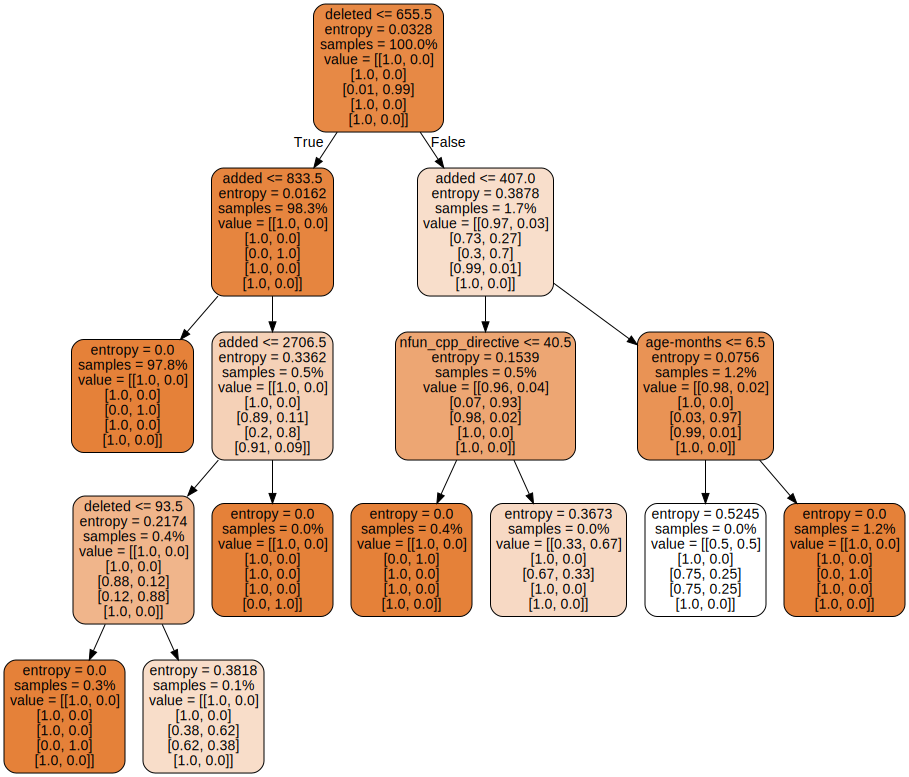

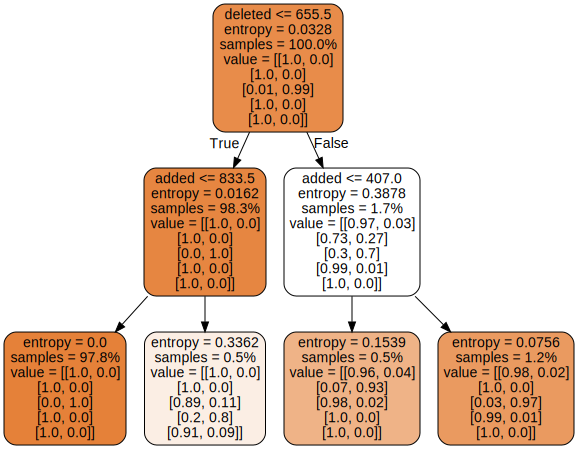

Response variable was added
Model.score: 0.967664
accuracy_score: 0.967664
             precision    recall  f1-score   support

          0       0.99      0.97      0.98      6070
          1       0.83      0.96      0.89       950

avg / total       0.97      0.97      0.97      7020

roc_auc_score: 0.963988
       name  importance
6  netchurn    0.496958
3   deleted    0.456239
5       soc    0.046803
Model.score: 0.981624
accuracy_score: 0.981624
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      6070
          1       0.96      0.91      0.93       950

avg / total       0.98      0.98      0.98      7020

roc_auc_score: 0.949419
       name  importance
2  netchurn    0.522517
0   deleted    0.477483


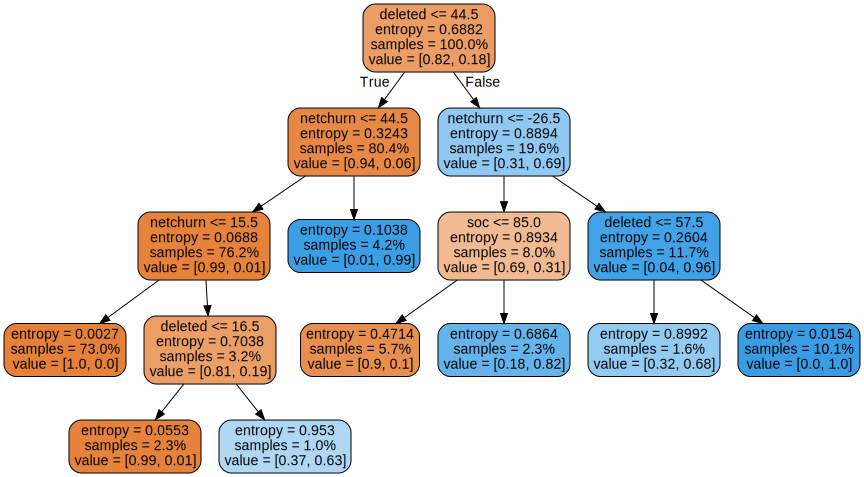

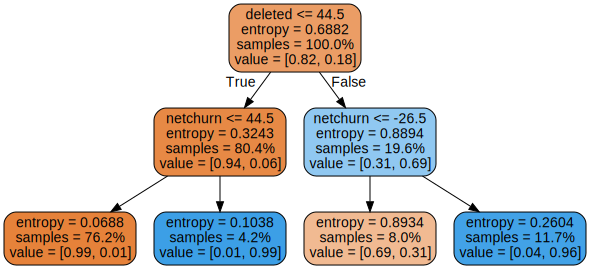

Response variable was added
Model.score: 0.888746
accuracy_score: 0.888746
             precision    recall  f1-score   support

          0       0.93      0.95      0.94      6070
          1       0.60      0.53      0.56       950

avg / total       0.88      0.89      0.89      7020

roc_auc_score: 0.736337
            name  importance
4            soc    0.423712
2         n-revs    0.248191
6          nline    0.158758
54  indent_lines    0.144400
55   indent_mean    0.024939
Model.score: 0.823789
accuracy_score: 0.823789
             precision    recall  f1-score   support

          0       0.86      0.95      0.90      6070
          1       0.05      0.02      0.03       950

avg / total       0.75      0.82      0.78      7020

roc_auc_score: 0.483906
     name  importance
1     soc    0.555729
0  n-revs    0.236048
2   nline    0.208223


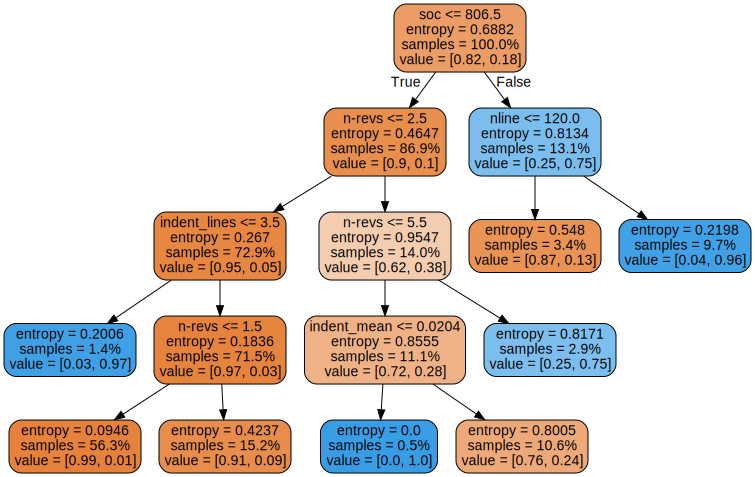

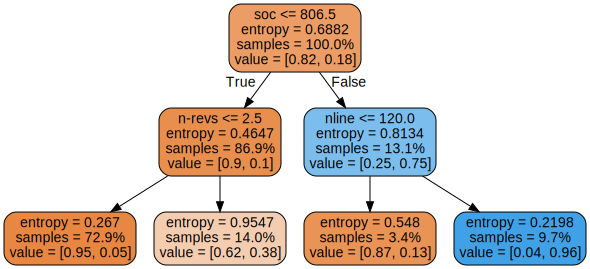

Response variable was added
Model.score: 0.877208
accuracy_score: 0.877208
             precision    recall  f1-score   support

          0       0.92      0.94      0.93      6070
          1       0.56      0.45      0.50       950

avg / total       0.87      0.88      0.87      7020

roc_auc_score: 0.697257
            name  importance
3            soc    0.464573
53  indent_lines    0.290158
5          nline    0.202204
51   nidentifier    0.023132
58          time    0.019933
Model.score: 0.881766
accuracy_score: 0.881766
             precision    recall  f1-score   support

          0       0.92      0.95      0.93      6070
          1       0.58      0.45      0.51       950

avg / total       0.87      0.88      0.88      7020

roc_auc_score: 0.699892
           name  importance
0           soc    0.565268
3  indent_lines    0.222935
1         nline    0.211797


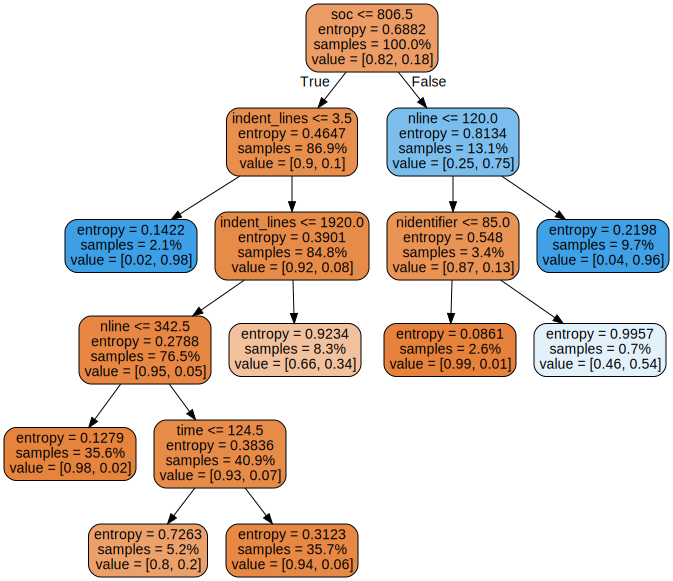

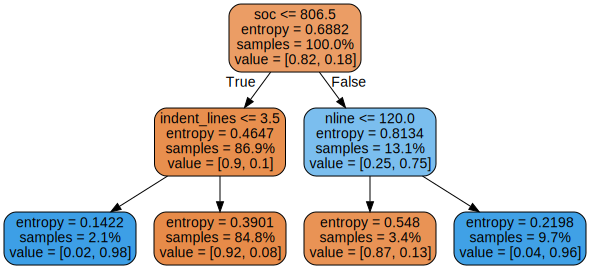

Response variable was added
Model.score: 0.877208
accuracy_score: 0.877208
             precision    recall  f1-score   support

          0       0.92      0.94      0.93      6070
          1       0.56      0.45      0.50       950

avg / total       0.87      0.88      0.87      7020

roc_auc_score: 0.697257
            name  importance
2            soc    0.464573
52  indent_lines    0.290158
4          nline    0.202204
50   nidentifier    0.023132
57          time    0.019933
Model.score: 0.881766
accuracy_score: 0.881766
             precision    recall  f1-score   support

          0       0.92      0.95      0.93      6070
          1       0.58      0.45      0.51       950

avg / total       0.87      0.88      0.88      7020

roc_auc_score: 0.699892
           name  importance
0           soc    0.565268
3  indent_lines    0.222935
1         nline    0.211797


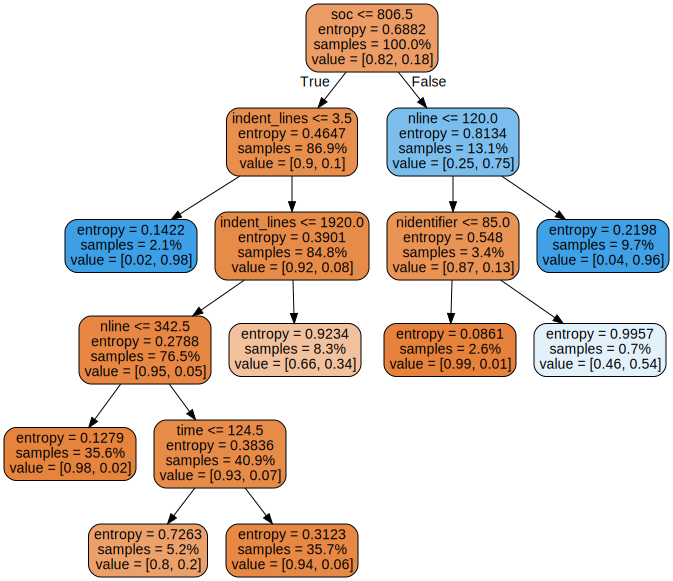

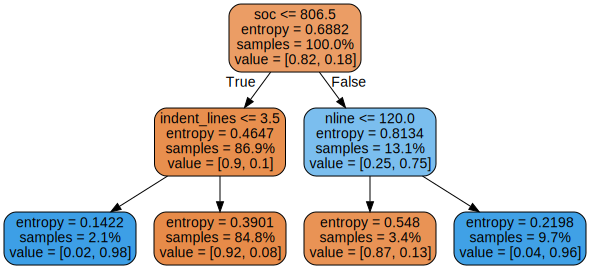

Response variable was nline
Model.score: 0.937378
                               name  importance
51                     indent_lines    0.985333
6                   line_length_max    0.004564
620      entity_crypto_evp_bio_ok.c    0.003974
34                 ncpp_conditional    0.002297
944     entity_crypto_srp_srp_vfy.c    0.002208
1030  entity_crypto_x509v3_v3_alt.c    0.001623
Model.score: 0.960171
              name  importance
2     indent_lines    0.995389
0  line_length_max    0.004611
Response variable was nline
Model.score: 0.702685
                  name  importance
52  unique_nidentifier    0.837149
33            ncomment    0.137592
53         indent_mean    0.012869
21               ngoto    0.012390
Model.score: 0.683886
                 name  importance
2  unique_nidentifier    0.871488
1            ncomment    0.128512
Response variable was nline
Model.score: 0.702685
                  name  importance
49  unique_nidentifier    0.837149
32            ncomment    0.13

In [4]:
rootDirectory = '../dataSets/openSSLstudy/'
metricsDataOpenSSL = toolkit.data.gatherTimeMetrics(rootDirectory, 'https://github.com/openssl/openssl', rootDirectory+'openssl/', '*/*.c */*.h *.c *.h', ['indent','c'], skipEvery=50)
caseStudyAnalysis(metricsDataOpenSSL)

253
(10054, 64)
1866
Response variable was netchurn
Model.score: 0.963589
accuracy_score: 0.963589
             precision    recall  f1-score   support

          0       0.98      0.97      0.98      4383
          1       0.84      0.89      0.86       643

avg / total       0.96      0.96      0.96      5026

roc_auc_score: 0.932677
       name  importance
3     added    0.493211
6       soc    0.302448
4   deleted    0.157343
61     time    0.046998
Model.score: 0.923199
accuracy_score: 0.923199
             precision    recall  f1-score   support

          0       0.92      1.00      0.96      4383
          1       0.94      0.43      0.59       643

avg / total       0.92      0.92      0.91      5026

roc_auc_score: 0.711124
      name  importance
0    added    0.494887
2      soc    0.370823
1  deleted    0.134291


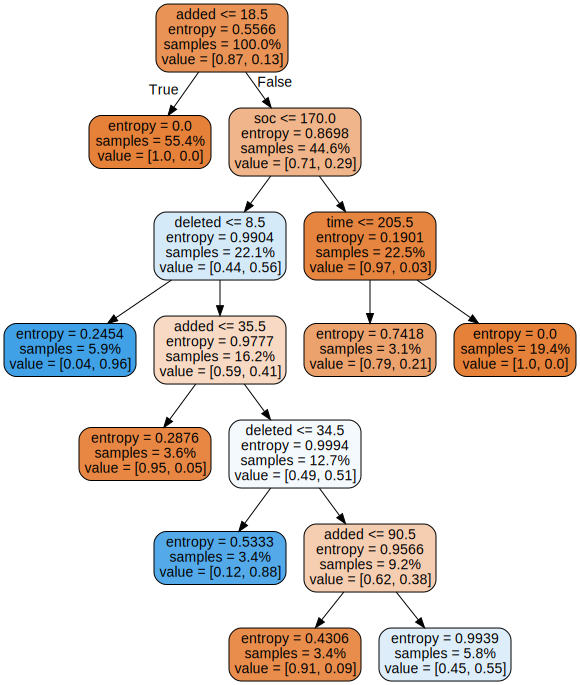

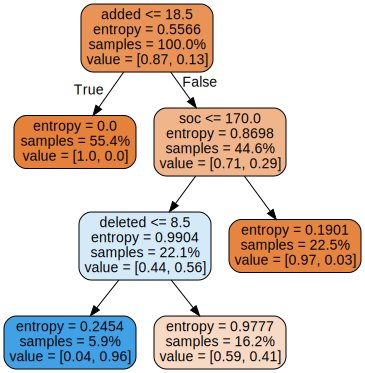

Response variable was netchurn
Model.score: 0.930811
accuracy_score: 0.930811
             precision    recall  f1-score   support

          0       0.96      0.96      0.96      1714
          1       0.75      0.79      0.77       295

avg / total       0.93      0.93      0.93      2009

roc_auc_score: 0.872453
      name  importance
3    added    0.480045
6      soc    0.328902
4  deleted    0.191053
Model.score: 0.968143
accuracy_score: 0.968143
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      1850
          1       0.94      0.64      0.76       159

avg / total       0.97      0.97      0.97      2009

roc_auc_score: 0.818863
      name  importance
3    added    0.429052
6      soc    0.365083
4  deleted    0.205865
Model.score: 0.959681
accuracy_score: 0.959681
             precision    recall  f1-score   support

          0       0.98      0.97      0.98      1787
          1       0.80      0.85      0.82       222

avg /

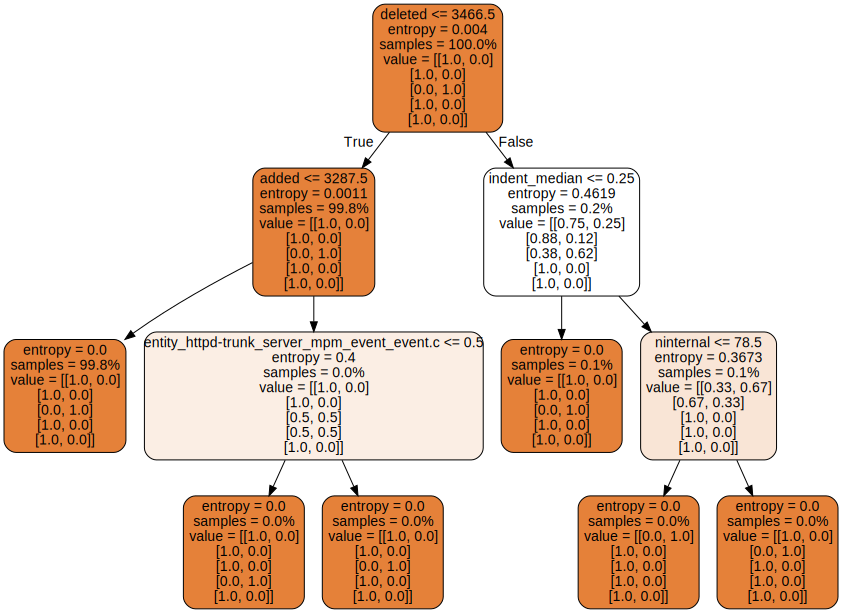

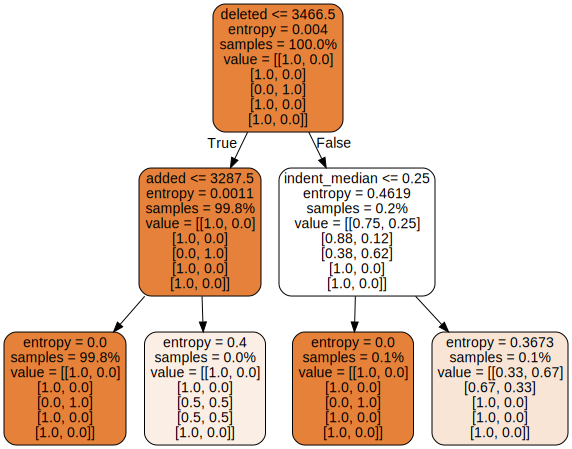

Response variable was ['churnLow', 'churnMedium', 'churnHigh', 'churnHigher', 'churnHighest']
Model.score: 0.998806
accuracy_score: 0.998806
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         2
          1       0.00      0.00      0.00         0
          2       1.00      1.00      1.00      3346
          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00         1

avg / total       1.00      1.00      1.00      3350

roc_auc_score cannot be computed for this test set
                                       name  importance
1702  entity_server_mpm_eventopt_eventopt.c    0.761435
45                          halstead_median    0.159531
36                            ncomment_char    0.079034
Model.score: 0.999104
accuracy_score: 0.999104
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.00      0.00      0.00         1
   

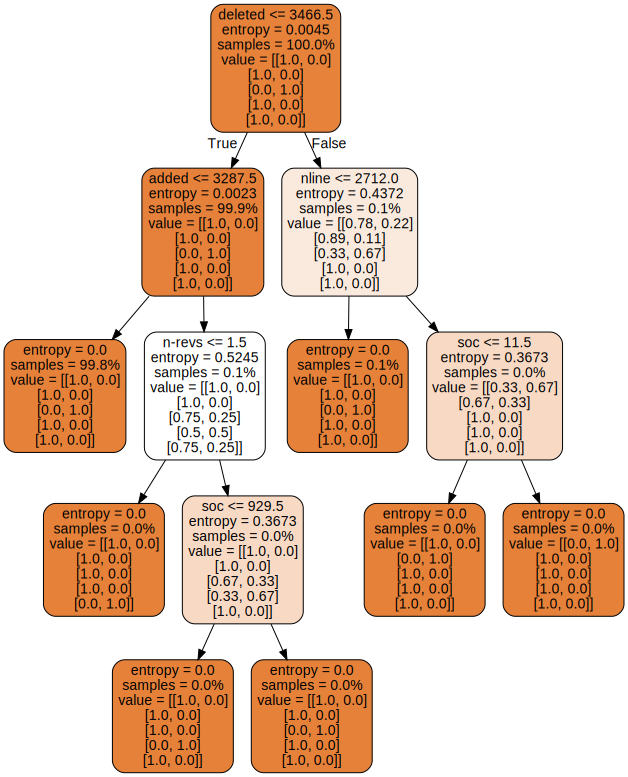

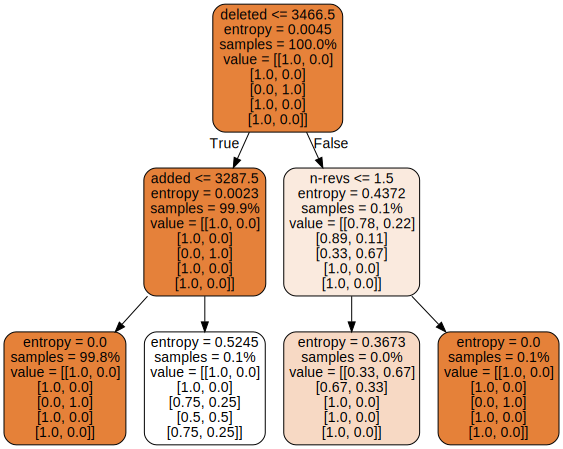

Response variable was added
Model.score: 0.987067
accuracy_score: 0.987067
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      4572
          1       0.95      0.91      0.93       454

avg / total       0.99      0.99      0.99      5026

roc_auc_score: 0.951229
       name  importance
3   deleted    0.581879
6  netchurn    0.418121
Model.score: 0.971548
accuracy_score: 0.971548
             precision    recall  f1-score   support

          0       0.99      0.98      0.98      4572
          1       0.82      0.87      0.85       454

avg / total       0.97      0.97      0.97      5026

roc_auc_score: 0.926828
       name  importance
0   deleted    0.598835
1  netchurn    0.401165


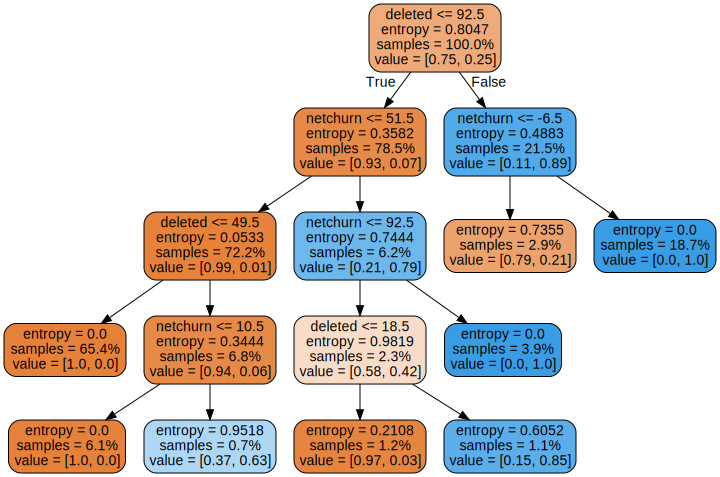

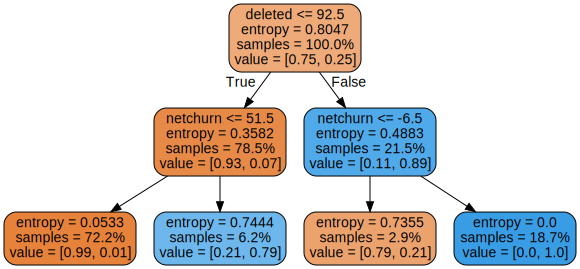

Response variable was added
Model.score: 0.942897
accuracy_score: 0.942897
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      4572
          1       0.69      0.66      0.68       454

avg / total       0.94      0.94      0.94      5026

roc_auc_score: 0.815851
            name  importance
54  indent_lines    0.758180
2         n-revs    0.211053
18     ninternal    0.021997
4            soc    0.008770
Model.score: 0.942897
accuracy_score: 0.942897
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      4572
          1       0.69      0.66      0.68       454

avg / total       0.94      0.94      0.94      5026

roc_auc_score: 0.815851
           name  importance
3  indent_lines    0.800517
0        n-revs    0.199483


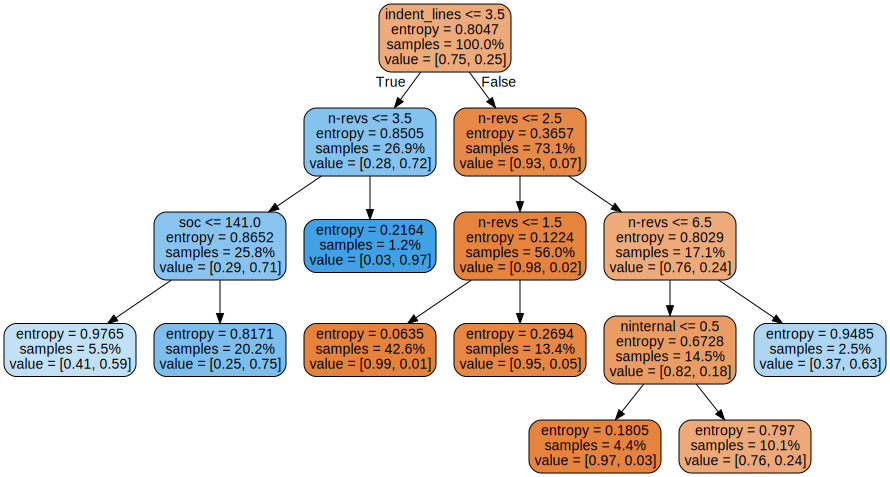

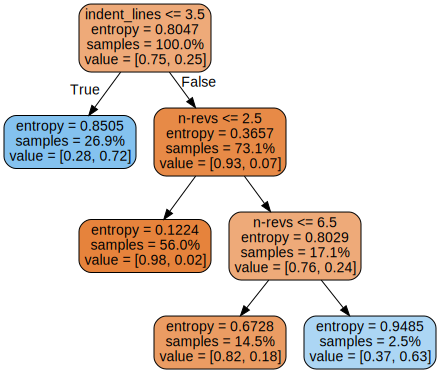

Response variable was added
Model.score: 0.911659
accuracy_score: 0.911659
             precision    recall  f1-score   support

          0       0.95      0.95      0.95      4572
          1       0.51      0.55      0.53       454

avg / total       0.91      0.91      0.91      5026

roc_auc_score: 0.747100
             name  importance
53   indent_lines    0.858392
2   fractal-value    0.054257
51    nidentifier    0.050038
3             soc    0.028608
0      age-months    0.008705
Model.score: 0.943494
accuracy_score: 0.943494
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      4572
          1       0.81      0.49      0.61       454

avg / total       0.94      0.94      0.94      5026

roc_auc_score: 0.740791
            name  importance
4   indent_lines    0.915421
3    nidentifier    0.053362
1  fractal-value    0.031217


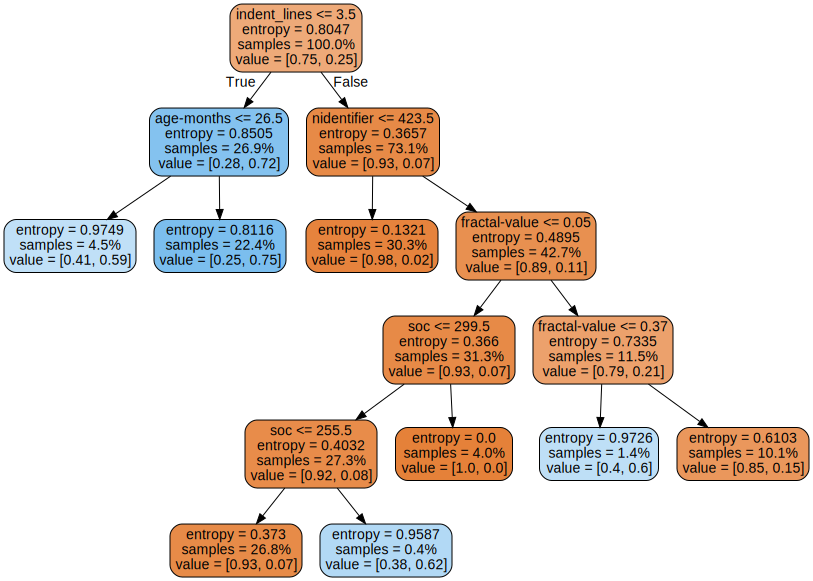

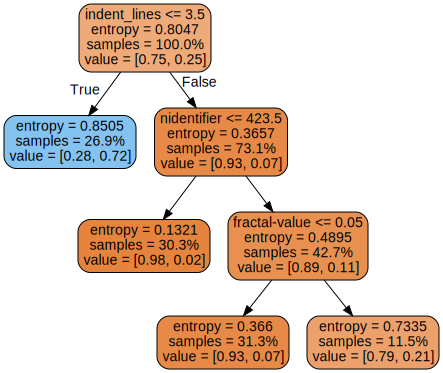

Response variable was added
Model.score: 0.911659
accuracy_score: 0.911659
             precision    recall  f1-score   support

          0       0.95      0.95      0.95      4572
          1       0.51      0.55      0.53       454

avg / total       0.91      0.91      0.91      5026

roc_auc_score: 0.747100
             name  importance
52   indent_lines    0.858392
1   fractal-value    0.054257
50    nidentifier    0.050038
2             soc    0.028608
57           time    0.008705
Model.score: 0.943494
accuracy_score: 0.943494
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      4572
          1       0.81      0.49      0.61       454

avg / total       0.94      0.94      0.94      5026

roc_auc_score: 0.740791
            name  importance
3   indent_lines    0.915421
2    nidentifier    0.053362
0  fractal-value    0.031217


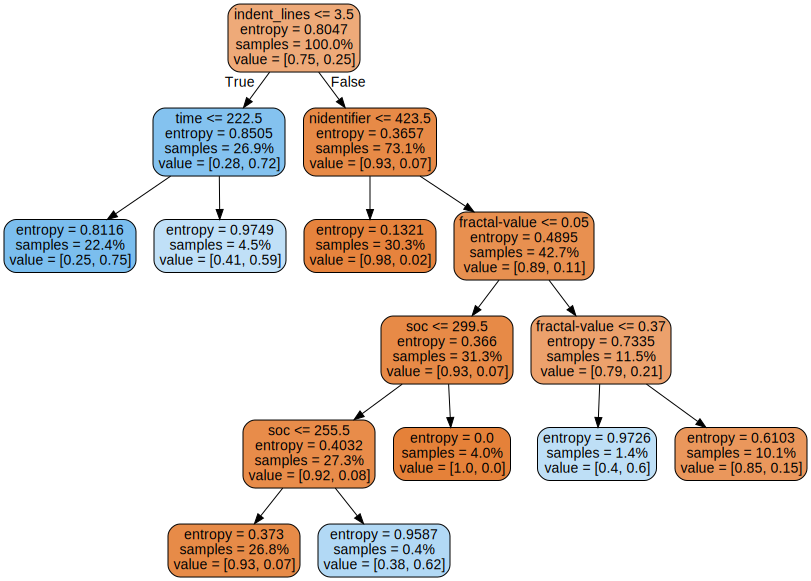

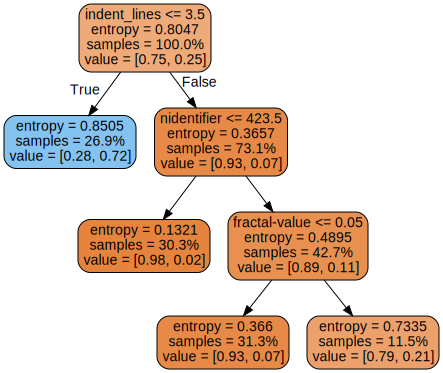

Response variable was nline
Model.score: 0.981601
             name  importance
51   indent_lines    0.989530
9      nstatement    0.003651
48  cyclomatic_sd    0.002223
3           nchar    0.001911
52    indent_mean    0.001726
31  ncomment_char    0.000959
Model.score: 0.985744
           name  importance
4  indent_lines    0.996324
1    nstatement    0.003676
Response variable was nline
Model.score: 0.844815
                    name  importance
52    unique_nidentifier    0.888064
33              ncomment    0.040484
17  statement_nesting_sd    0.033494
20                 nenum    0.013785
57                  time    0.012103
18             ninternal    0.012069
Model.score: 0.854922
                 name  importance
4  unique_nidentifier      0.9564
3            ncomment      0.0436
Response variable was nline
Model.score: 0.844815
                    name  importance
49    unique_nidentifier    0.888064
32              ncomment    0.040484
16  statement_nesting_sd    0.033494
19 

In [5]:
rootDirectory = '../dataSets/httpdStudy/'
metricsDataHTTPD = toolkit.data.gatherTimeMetrics(rootDirectory, 'https://github.com/apache/httpd', rootDirectory+'httpd/', '*/*.c */*.h *.c *.h', ['indent','c'], branch='trunk', skipEvery=50)
caseStudyAnalysis(metricsDataHTTPD)

88
(3457, 64)
481
Response variable was netchurn
Model.score: 0.936306
accuracy_score: 0.936306
             precision    recall  f1-score   support

          0       0.96      0.95      0.95      1223
          1       0.89      0.89      0.89       504

avg / total       0.94      0.94      0.94      1727

roc_auc_score: 0.923534
         name  importance
3       added    0.903592
4     deleted    0.077075
0  age-months    0.019333
Model.score: 0.929357
accuracy_score: 0.929357
             precision    recall  f1-score   support

          0       0.97      0.92      0.95      1223
          1       0.84      0.94      0.89       504

avg / total       0.93      0.93      0.93      1727

roc_auc_score: 0.932626
      name  importance
1    added    0.943084
2  deleted    0.056916


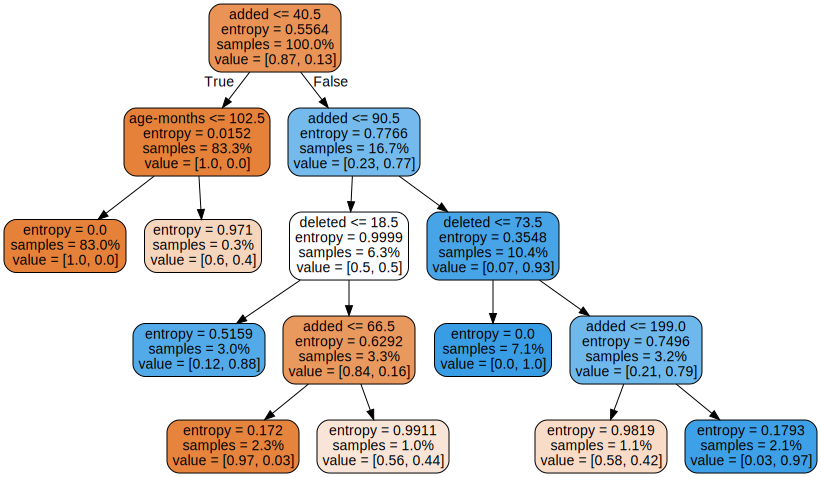

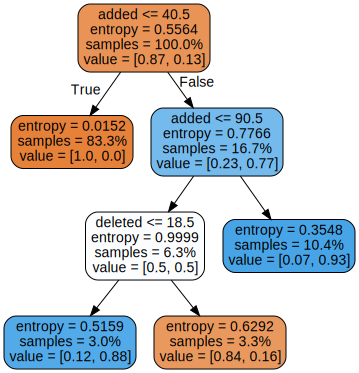

Response variable was netchurn
Model.score: 0.984058
accuracy_score: 0.984058
             precision    recall  f1-score   support

          0       1.00      0.99      0.99       635
          1       0.87      0.95      0.90        55

avg / total       0.98      0.98      0.98       690

roc_auc_score: 0.966428
            name  importance
3          added    0.909575
4        deleted    0.062964
43  halstead_min    0.019466
42    nfunction2    0.007995
Model.score: 0.965217
accuracy_score: 0.965217
             precision    recall  f1-score   support

          0       0.99      0.96      0.98       550
          1       0.87      0.97      0.92       140

avg / total       0.97      0.97      0.97       690

roc_auc_score: 0.967532
                 name  importance
3               added    0.905446
4             deleted    0.082950
51  cyclomatic_median    0.011604
Model.score: 0.939130
accuracy_score: 0.939130
             precision    recall  f1-score   support

          0    

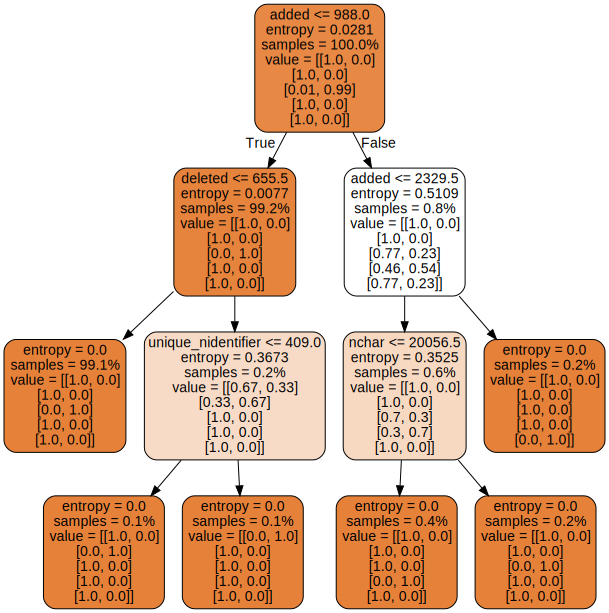

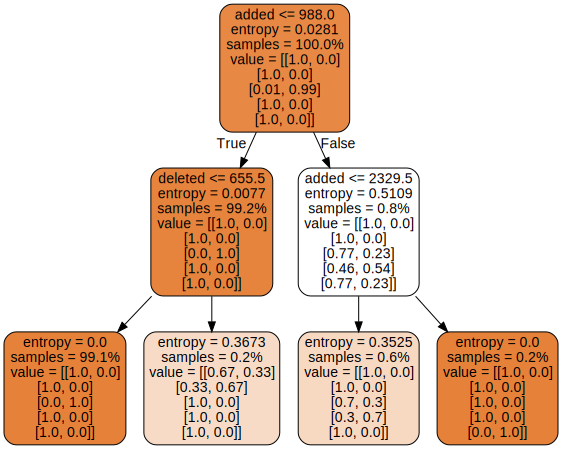

Response variable was ['churnLow', 'churnMedium', 'churnHigh', 'churnHigher', 'churnHighest']
Model.score: 0.989574
accuracy_score: 0.989574
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.83      0.56      0.67         9
          2       1.00      1.00      1.00      1131
          3       0.73      0.73      0.73        11
          4       0.00      0.00      0.00         0

avg / total       0.99      0.99      0.99      1151

roc_auc_score cannot be computed for this test set
                name  importance
3              added    0.598996
4            deleted    0.311267
59     indent_median    0.059825
39  ncpp_conditional    0.029912
Model.score: 0.986099
accuracy_score: 0.986099
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.43      1.00      0.60         6
          2       1.00      0.99      0.99      1137
         

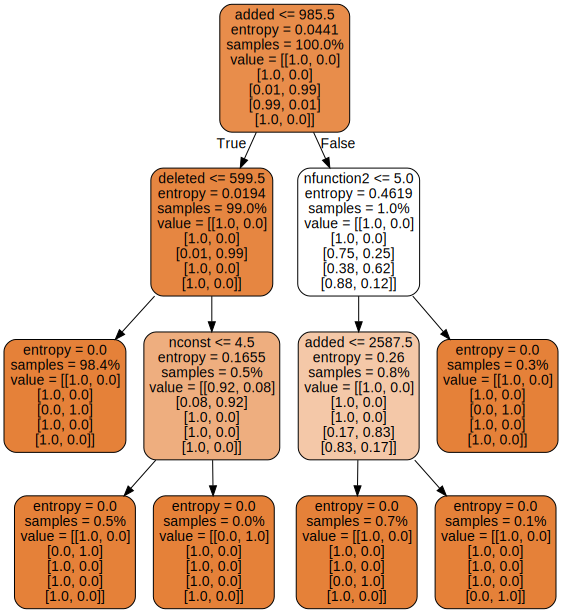

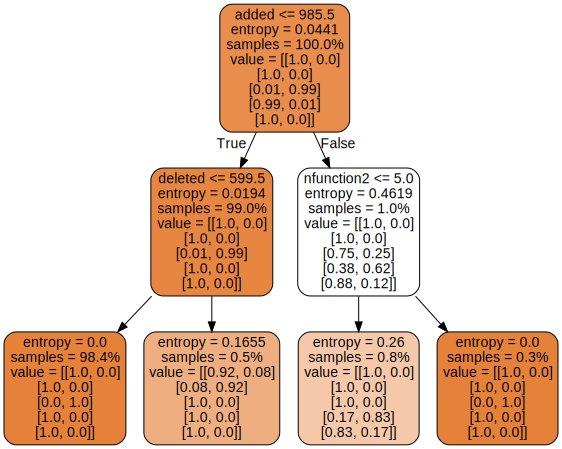

Response variable was added
Model.score: 0.956572
accuracy_score: 0.956572
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1231
          1       0.98      0.86      0.92       496

avg / total       0.96      0.96      0.96      1727

roc_auc_score: 0.929210
       name  importance
6  netchurn    0.824621
3   deleted    0.175379
Model.score: 0.939201
accuracy_score: 0.939201
             precision    recall  f1-score   support

          0       0.94      0.98      0.96      1231
          1       0.95      0.83      0.89       496

avg / total       0.94      0.94      0.94      1727

roc_auc_score: 0.907997
       name  importance
1  netchurn    0.850961
0   deleted    0.149039


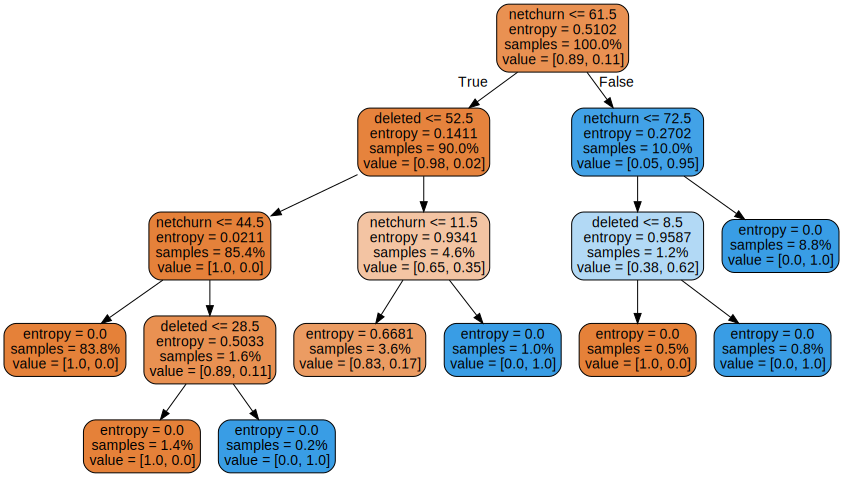

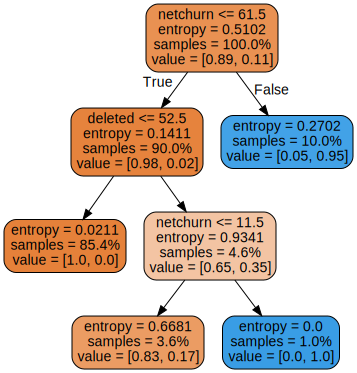

Response variable was added
Model.score: 0.763752
accuracy_score: 0.763752
             precision    recall  f1-score   support

          0       0.87      0.79      0.83      1231
          1       0.57      0.71      0.63       496

avg / total       0.78      0.76      0.77      1727

roc_auc_score: 0.747609
                  name  importance
2               n-revs    0.585222
58          indent_max    0.313402
46          nfunction3    0.063172
8   line_length_median    0.038203
Model.score: 0.718587
accuracy_score: 0.718587
             precision    recall  f1-score   support

          0       0.93      0.65      0.77      1231
          1       0.51      0.89      0.64       496

avg / total       0.81      0.72      0.73      1727

roc_auc_score: 0.768292
         name  importance
0      n-revs    0.668764
3  indent_max    0.331236


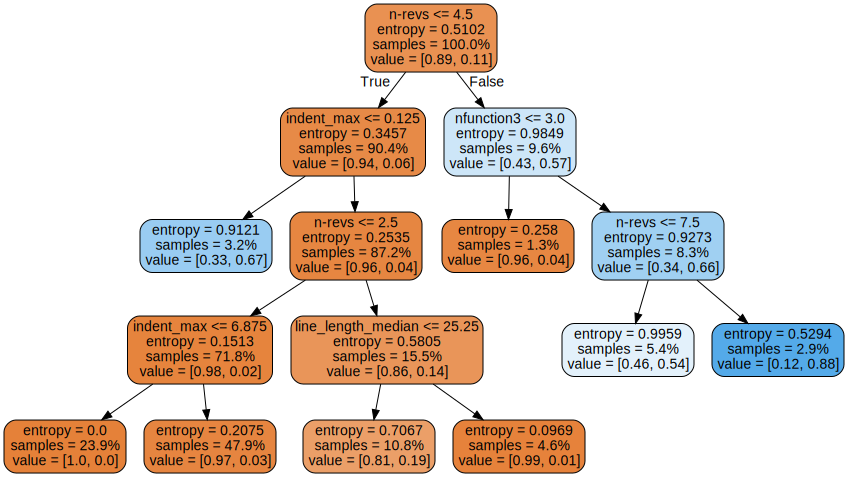

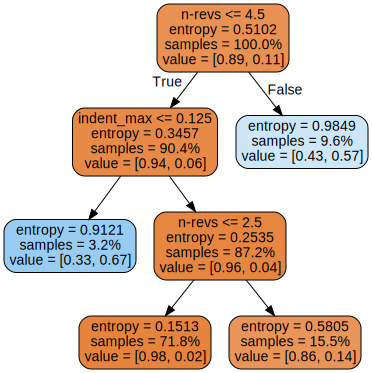

Response variable was added
Model.score: 0.702953
accuracy_score: 0.702953
             precision    recall  f1-score   support

          0       0.77      0.83      0.80      1231
          1       0.48      0.38      0.42       496

avg / total       0.69      0.70      0.69      1727

roc_auc_score: 0.606852
                            name  importance
57                    indent_max    0.406422
4                          nchar    0.326642
39                    nfunction2    0.121963
47               cyclomatic_mean    0.038840
3                            soc    0.036018
136  entity_src_core_ngx_shmtx.c    0.035149
58                          time    0.034966
Model.score: 0.702953
accuracy_score: 0.702953
             precision    recall  f1-score   support

          0       0.77      0.83      0.80      1231
          1       0.48      0.38      0.42       496

avg / total       0.69      0.70      0.69      1727

roc_auc_score: 0.606852
         name  importance
4  indent_max 

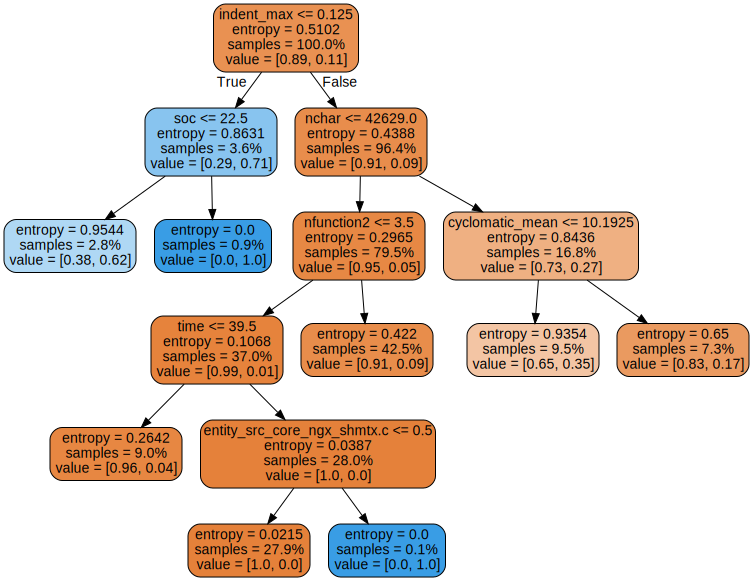

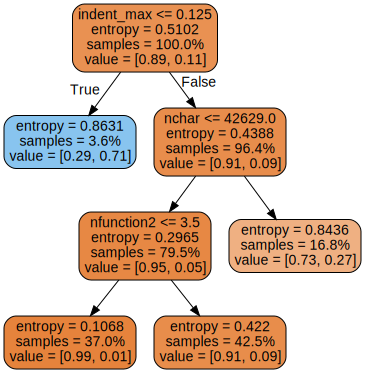

Response variable was added
Model.score: 0.759120
accuracy_score: 0.759120
             precision    recall  f1-score   support

          0       0.78      0.91      0.84      1231
          1       0.64      0.38      0.47       496

avg / total       0.74      0.76      0.74      1727

roc_auc_score: 0.645649
                            name  importance
52                  indent_lines    0.406422
3                          nchar    0.326642
44                    nfunction3    0.121963
46               cyclomatic_mean    0.038840
2                            soc    0.036018
135  entity_src_core_ngx_shmtx.c    0.035149
57                          time    0.034966
Model.score: 0.759120
accuracy_score: 0.759120
             precision    recall  f1-score   support

          0       0.78      0.91      0.84      1231
          1       0.64      0.38      0.47       496

avg / total       0.74      0.76      0.74      1727

roc_auc_score: 0.645649
           name  importance
4  indent_li

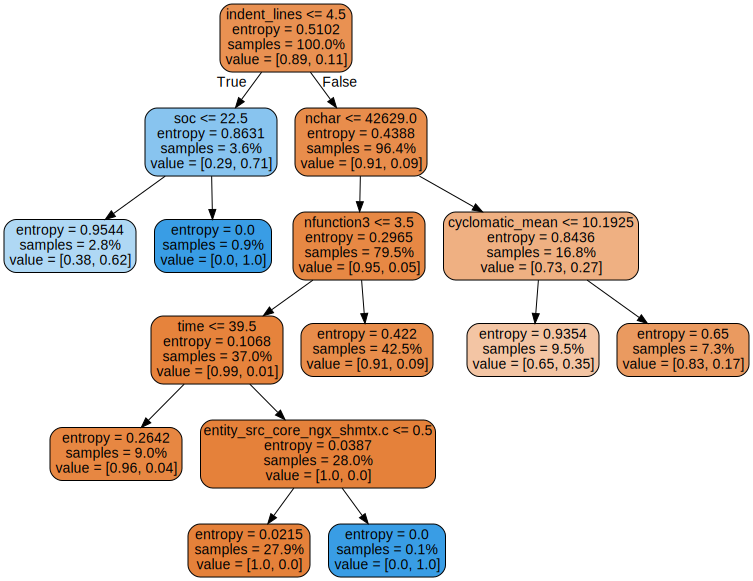

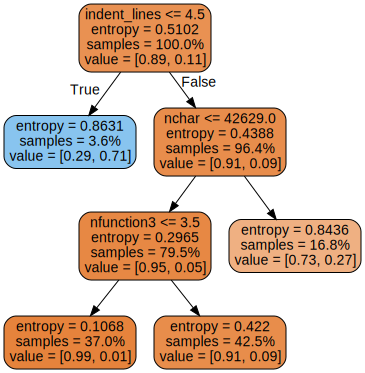

Response variable was nline
Model.score: 0.955532
                                      name  importance
51                            indent_lines    0.980762
41                            halstead_max    0.008629
32                          ncpp_directive    0.004226
7                           line_length_sd    0.002395
377  entity_src_mail_ngx_mail_ssl_module.c    0.002391
0                               age-months    0.001597
Model.score: 0.974413
           name  importance
3  indent_lines    0.991278
2  halstead_max    0.008722
Response variable was nline
Model.score: 0.678627
                     name  importance
12              nfunction    0.816641
52     unique_nidentifier    0.059777
42          halstead_mean    0.037028
16  statement_nesting_max    0.036880
18              ninternal    0.034151
34          ncomment_char    0.015523
Model.score: 0.679498
                 name  importance
0           nfunction    0.894022
5  unique_nidentifier    0.065441
4       halstead_me

In [6]:
rootDirectory = '../dataSets/nginxStudy/'
metricsDataNginx = toolkit.data.gatherTimeMetrics(rootDirectory, 'https://github.com/nginx/nginx', rootDirectory+'nginx/', '*/*.c */*.h *.c *.h', ['indent','c'], skipEvery=50)
caseStudyAnalysis(metricsDataNginx)